### 导包

In [1]:
import random
import sys

import cv2
import joblib
import numpy
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os
import numpy as np
from  tqdm import *
import torch
import warnings
import sys

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

### 数据集读取

In [12]:
ROOT = os.getcwd()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


train='//training'
test='//evaluation'
validation= '//validation'
train_path = ROOT + train
test_path = ROOT +  test
vail_path = ROOT + validation



label = {'food': 0, 'non_food': 1}
di = os.listdir(train_path)
X_train_path = []
Y_train = []

for i in di:
    for j in list(os.walk(os.path.join(train_path, i)))[-1][-1]:
        X_train_path.append(os.path.join(train_path, i) + '\\' + j)
        Y_train.append(label[i])


print('训练集路径', train_path)
print('训练集图像数量', len(X_train_path))
print('类别个数', len(di))
print('各类别名称', di)

di = os.listdir(test_path)
X_test_path = []
Y_test = []
for i in di:
    for j in list(os.walk(os.path.join(test_path, i)))[-1][-1]:
        X_test_path.append(os.path.join(test_path, i) + '\\' + j)
        Y_test.append(label[i])

print('\n')
print('测试集路径', test_path)
print('测试集图像数量', len(X_test_path))
print('类别个数', len(di))
print('各类别名称', di)

di = os.listdir(vail_path)
V_path = []
V_label = []
for i in di:
    for j in list(os.walk(os.path.join(vail_path, i)))[-1][-1]:
        V_path.append(os.path.join(vail_path, i) + '\\' + j)
        V_label.append(label[i])


print('\n')
print('验证集路径', vail_path)
print('验证集图像数量', len(V_path))
print('类别个数', len(di))
print('各类别名称', di)

print('训练集加载：')
XX_train = []
for i in X_train_path:
    img = cv2.imread(i)
    img = cv2.resize(img,(24,24),interpolation=cv2.INTER_CUBIC)
    XX_train.append(img.flatten())
print('测试集加载')
XX_test = []
for i in X_test_path:
    img = cv2.imread(i)
    img = cv2.resize(img,(24,24),interpolation=cv2.INTER_CUBIC)
    XX_test.append(img.flatten())
print('验证集加载')
V_data = []
for i in V_path:
    img = cv2.imread(i)
    img = cv2.resize(img,(24,24),interpolation=cv2.INTER_CUBIC)
    V_data.append(img.flatten())

# from sklearn.decomposition import PCA
# X = XX_train  #导入数据，维度为65536
# pca = PCA(n_components=100)     #降到100维
# pca.fit(X)                      #训练
# train =pca.fit_transform(X)     #降维后的数据
# print(pca.explained_variance_ratio_)  #输出贡献率
# XX_train = pca.fit_transform(XX_train)
# XX_test = pca.fit_transform(XX_test)
# V_data = pca.fit_transform(V_data)


c = list(zip(XX_train,Y_train))
random.shuffle(c)
XX_train, Y_train = zip(*c)
XX_train, Y_train = list(XX_train),list(Y_train)



c = list(zip(XX_test, Y_test))
random.shuffle(c)
XX_test, Y_test = zip(*c)
XX_test, Y_test = list(XX_test), list(Y_test)

c = list(zip(V_data,V_label))
random.shuffle(c)
V_data, V_label = zip(*c)
V_data,V_label = list(V_data),list(V_label)



print('')
X_train = {}
for i in range(len(XX_train)):
    X_train[str(i)] = Y_train[i]
print('训练集数据检查：',list(X_train.values())==Y_train)
# print(len(list(X_train.values())[0]))
# print(len(Y_train))

X_test = {}
for i in range(len(XX_test)):
    X_test[str(i)] = Y_test[i]
print('测试集数据检查：',list(X_test.values())==Y_test)


VV_train = {}
for i in range(len(V_data)):
    VV_train[str(i)] = V_label[i]

print('验证集数据检查：',list(VV_train.values())==V_label)



Y_train = numpy.array(Y_train)
Y_test = numpy.array(Y_test)
V_label = numpy.array(V_label)
print('数据初始化完成！')

训练集路径 D:\2020185_and_10208\Kernel_Class\Machine-Learning\Coursr_Design\Experiment2//training
训练集图像数量 3000
类别个数 2
各类别名称 ['food', 'non_food']


测试集路径 D:\2020185_and_10208\Kernel_Class\Machine-Learning\Coursr_Design\Experiment2//evaluation
测试集图像数量 1000
类别个数 2
各类别名称 ['food', 'non_food']


验证集路径 D:\2020185_and_10208\Kernel_Class\Machine-Learning\Coursr_Design\Experiment2//validation
验证集图像数量 1000
类别个数 2
各类别名称 ['food', 'non_food']
训练集加载：
测试集加载
验证集加载

训练集数据检查： True
测试集数据检查： True
验证集数据检查： True
数据初始化完成！


### 查看一个训练数据的维度

In [4]:
print(XX_train[0].shape)

(1728,)


### 降维——PCA

In [5]:
# from sklearn.decomposition import PCA
# X = XX_train  #导入数据，维度为65536
# pca = PCA(n_components=100)     #降到100维
# pca.fit(X)                      #训练
# train =pca.fit_transform(X)     #降维后的数据
# print(pca.explained_variance_ratio_)  #输出贡献率
# XX_train = pca.fit_transform(XX_train)
# XX_test = pca.fit_transform(XX_test)
# V_data = pca.fit_transform(V_data)

In [6]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report
#
# # print(XX_train)
# # print(type(XX_test))
# # print(V_data)
# # def model_training():
# #     models = {
# #         'Bayes': BernoulliNB(),
# #         'tree': DecisionTreeClassifier(),
# #         'KNN': KNeighborsClassifier(n_neighbors=2),
# #         'SVM': SVC()
# #     }
# #     epochs = 400
# #     #  定义调参的超参数
# #     C = [0.2, 0.4, 0.5, 0.6, 0.7, 0.8]  # SVM的惩罚系数
# #     K = [2, 3, 5, 6, 7, 8]  # KNN的近邻参数
# #     SVM_ACC = {}
# #     KNN_ACC = {}
# #     for model in models.keys():
# #         if model == 'SVM':
# #             for epoch in range(1, epochs + 1):
# #                 print(model+'的第%d轮'%epoch)
# #                 # clf = SVC(C=C[epoch // 100]).fit(XX_train, Y_train)
# #                 if epoch % 100 == 0:
# #                     # acc = round(clf.score(V_data, V_label), 2)
# #                     acc = 1
# #                     print("惩罚系数C=%.1f在验证集上准确率:" % C[epoch // 100], acc)
# #                     # SVM_ACC[str(epoch // 100)] = acc
# #
# #         elif model == 'KNN':
# #             for epoch in range(epochs):
# #                 print(model+'的第%d轮'%epoch)
# #                 clf = KNeighborsClassifier(n_neighbors=K[epoch // 100]).fit(XX_train, Y_train)
# #                 if epoch % 100 == 0:
# #                     # Accuracy = clf.score(XX_test,Y_test)
# #                     # acc = round(clf.score(XX_test, Y_test), 2)
# #                     acc = 2
# #                     print("惩罚系数C=%.1f在验证集上准确率:" % K[epoch // 100], acc)
# #                     KNN_ACC[str(epoch // 100)] = acc
# #         else:
# #             Acc = 0
# #             # clf = models[model].fit(XX_train, Y_train)
# #             # acc = clf.score(XX_test, Y_test)
# #             acc = 3
# #             for epoch in range(epochs):
# #                 # print(model+'的第%d轮'%epoch)
# #                 clf = KNeighborsClassifier(n_neighbors=K[epoch // 100]).fit(XX_train, Y_train)
# #                 if acc > Acc:
# #                     # joblib.dump(clf,'model_best.pt')
# #                     # print('保存'+model+'模型')
# #                     Acc = acc
# #         # predictions_labels = clf.predict(XX_test)
# #         print(u'预测结果:')
# #         # print(predictions_labels)
# #         print(u'算法评价:')
# #         # print(classification_report(Y_test, predictions_labels))
# #
# #     # plt.subplot(1, 2, 1)
# #     # plt.plot([float(i) for i in SVM_ACC.keys()], SVM_ACC.values(), c='red')
# #     # plt.xlabel('惩罚因子C')
# #     # plt.ylabel('验证集上的准确率')
# #     # plt.title('SVM调参图')
# #     # plt.savefig('SVM.jpg')
# #     #
# #     # plt.subplot(122)
# #     # plt.plot([float(i) for i in SVM_ACC.keys()], SVM_ACC.values(), c='red')
# #     # plt.xlabel('邻居值K')
# #     # plt.ylabel('验证集上的准确率')
# #     # plt.title('KNN调参图')
# #     # plt.savefig('KNN.jpg')
# def model_training():
#     models = {
#         'tree': DecisionTreeClassifier(),
#         'Bayes': BernoulliNB(),
#         'KNN': KNeighborsClassifier(n_neighbors=2),
#         'SVM': SVC()
#     }
#     epochs = 100
#     #  定义调参的超参数
#     C = [0.2, 0.4, 0.5, 0.6, 0.7, 0.8]  # SVM的惩罚系数
#     K = [2, 3, 5, 6, 7, 8]  # KNN的近邻参数
#     SVM_ACC = {}
#     KNN_ACC = {}
#     for model in models.keys():
#         print('-------------------------------正在训练%s----------------------------------' %model)
#         if model == 'SVM':
#             Acc=0
#             for epoch in range(1, epochs + 1):
#                 print('C=',C[epoch // 20])
#                 clf = SVC(C=C[epoch // 20],kernel='linear', probability=True).fit(XX_train, Y_train)
#                 acc = round(clf.score(V_data, V_label), 2)
#                 print(model+'%d训练集上的正确率：'%epoch,clf.score(V_data, V_label))
#                 print(model+'验证集上的正确率：'%epoch,acc)
#                 if acc > Acc:
#                     joblib.dump(clf, model + '_best.pt')
#                     Acc = acc
#                 if epoch % 20 == 0:
#                     print("惩罚系数C=%.1f在验证集上准确率:" % (C[epoch // 20]), acc)
#                     SVM_ACC[str(epoch // 20)] = Acc
#
#
#         elif model == 'KNN':
#             Acc = 0
#             for epoch in range(epochs):
#                 print('K=', K[epoch // 20])
#                 clf = KNeighborsClassifier(n_neighbors=K[epoch // 20]).fit(XX_train, Y_train)
#                 acc = round(clf.score(V_data, V_label), 2)
#                 print(model+'%d训练集上的正确率：'%epoch,clf.score(V_data, V_label))
#                 print(model+'%d验证集上的正确率：'%epoch,acc)
#                 if acc > Acc:
#                     joblib.dump(clf, model + '_best.pt')
#                     Acc = acc
#                 if epoch % 20 == 0:
#                     print("K=%.1f在验证集上准确率:" % K[epoch // 20], acc)
#                     KNN_ACC[str(epoch // 20)] = Acc
#         else:
#             Acc = 0
#             for epoch in range(1, epochs + 1):
#                 clf = models[model].fit(XX_train, Y_train)
#                 acc = round(clf.score(V_data, V_label), 2)
#                 print(model+'%d轮训练集上的正确率：'%epoch,clf.score(V_data, V_label))
#                 print(model+'%d验证集上的正确率：'%epoch,acc)
#                 if acc > Acc:
#                     joblib.dump(clf, model + '_best.pt')
#                     Acc = acc
#
#
#         predictions_labels = clf.predict(XX_test)
#         print(u'预测结果:')
#         print(predictions_labels)
#         print(u'算法评价:')
#         print(classification_report(Y_test, predictions_labels))
#
#     plt.subplot(1, 2, 1)
#     plt.plot([float(i) for i in SVM_ACC.keys()], SVM_ACC.values(), c='red')
#     plt.xlabel('惩罚因子C')
#     plt.ylabel('验证集上的准确率')
#     plt.title('SVM调参图')
#     plt.savefig('SVM.jpg')
#
#     plt.subplot(122)
#     plt.plot([float(i) for i in SVM_ACC.keys()], SVM_ACC.values(), c='red')
#     plt.xlabel('邻居值K')
#     plt.ylabel('验证集上的准确率')
#     plt.title('KNN调参图')
#     plt.savefig('KNN.jpg')
#
#
#     plt.show()
# model_training()

### 查看训练集数据

  0%|          | 9/3000 [00:00<00:50, 59.75it/s]


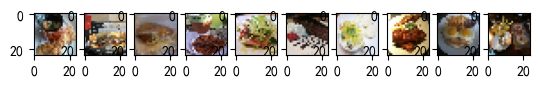

In [13]:
pic_sum = 10
j = 1
for k in tqdm(range(len(X_train_path))):
    i = X_train_path[k]
    plt.subplot(1,pic_sum,j)
    img = cv2.imread(i)
    img = cv2.resize(img,(24,24),interpolation
                            =cv2.INTER_CUBIC)
    # img = cv2.imread
    plt.imshow(img[:, :, ::-1])  # 转为RGB
    j+=1
    if j == pic_sum+1:
       break
plt.show()

### 测试模型的正确率

In [ ]:
import joblib
model = joblib.load('Bayes_best.pt')
model.predict(XX_test,Y_test)

In [ ]:
print(1+1)

In [ ]:
C = [i/10 for i in range(1,11)]  # SVM的惩罚系数
K = [j for j in range(1,11)]  # KNN的近邻参数
print(C)
print(K)

### 准确率

  4%|▎         | 35/1000 [00:00<00:02, 347.46it/s]

读取数据准确率中


  2%|▏         | 19/1000 [00:00<00:05, 188.54it/s]

读取数据召回率中


100%|██████████| 1000/1000 [00:05<00:00, 186.13it/s]


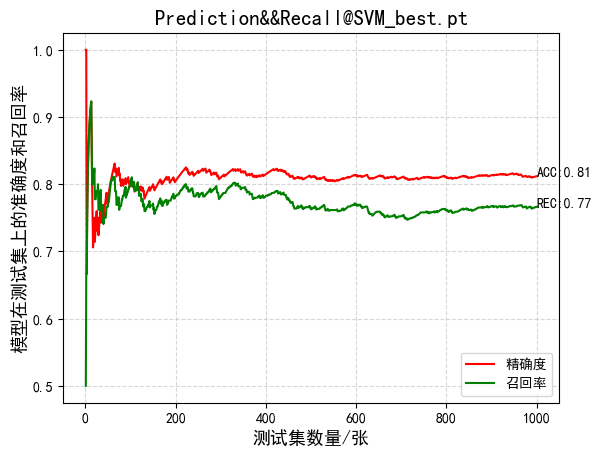

In [26]:
model_name = 'SVM_best.pt'
clf = joblib.load('models/'+model_name)
correct = 0
pre = []
print('读取数据准确率中')
for i in tqdm(range(len(XX_test))):
    if clf.predict([XX_test[i]])[0] == Y_test[i]:
        correct += 1
    p = correct / (i+1)
    pre.append(p)

wrong = 0
right = 0
rec = []
print('读取数据召回率中')
for i in tqdm(range(len(XX_test))):
    if clf.predict([XX_test[i]])[0] == Y_test[i] and Y_test[i] == 0:
        right += 1
    if clf.predict([XX_test[i]])[0] != Y_test[i] and Y_test[i] == 0:
        wrong += 1
    rec.append(right/(right+wrong+1))

X = [i+1 for i in range(len(XX_test))]
Y = [j for j in pre]
Y_rec = [j for j in rec]
plt.plot(X,Y,c='red',label='精确度')
plt.plot(X,Y_rec,c='green',label='召回率')
plt.text(X[-1],Y[-1],s='ACC:%.2f'%Y[-1])
plt.text(X[-1],Y_rec[-1],s='REC:%.2f'%Y_rec[-1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('测试集数量/张',fontsize=13)
plt.ylabel('模型在测试集上的准确度和召回率',fontsize=13)
plt.title('Prediction&&Recall@'+model_name,fontsize=15)
plt.legend(loc="lower right")
plt.savefig('figures/'+model_name.split('.')[0]+'.jpg')
plt.show()

### 微调测试集测试模型

In [2]:
import argparse
import os
import random
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")
import cv2
import joblib
import numpy as np
from PIL import Image, ImageFont, ImageDraw
import torch
import torch.nn.functional as F
from torchvision import models

idx_to_labels = np.load('label/idx_to_labels.npy', allow_pickle=True).item()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print('device:', device)

from torchvision import transforms

font = ImageFont.truetype('font/SimHei.ttf', 32)

# 测试集图像预处理-RCTN：缩放裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                                     ])

device: cpu


In [4]:
def process_frame_pth(img, model):
    model = torch.load(model, map_location=torch.device(device))
    model = model.eval().to(device)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR转RGB
    img_pil = Image.fromarray(img_rgb)  # array 转 PIL
    input_img = test_transform(img_pil).unsqueeze(0).to(device)  # 预处理
    pred_logits = model(input_img)  # 执行前向预测，得到所有类别的 logit 预测分数
    _, pred_ids = torch.max(pred_logits, 1)
    img = np.array(img_pil)  # PIL 转 array
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # RGB转BGR
    # 图片，添加的文字，左上角坐标，字体，字体大小，颜色，线宽，线型
    cv2.putText(img, idx_to_labels[int(pred_ids)], (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)
    # return img, idx_to_labels[int(pred_ids)]  # 部署
    return int(pred_ids)        # 返回标签值

In [5]:
from tqdm import tqdm
model_name = 'resnet18_best.pth'
model_name1 = 'models/'+model_name
# model = torch.load(model_name, map_location=torch.device(device))
img = 'evaluation/'  # 测试集路径
labels = os.listdir(img)
print(labels)
pic_path = []       # 所有测试集图像的路径
X = []          # 测试集向量化的数据
Y = []          # 测试集标签
for label in labels:      # 遍历类别文件夹
    path = img+label
    for pic in os.listdir(path):
        pic_path.append(path+'/'+pic)
        Y.append(labels.index(label))
ID = []
for i in tqdm(range(len(pic_path))):
    pic = pic_path[i]
    im = cv2.imread(pic)
    ID.append(process_frame_pth(im,model_name1))
print('图像处理完毕！')

  0%|          | 2/1000 [00:00<01:19, 12.53it/s]

['food', 'non_food']


100%|██████████| 1000/1000 [01:37<00:00, 10.21it/s]

图像处理完毕！


In [6]:
print(idx_to_labels)

{0: 'food', 1: 'non_food'}


In [7]:
correct = 0
pre_pth = []
for i in tqdm(range(len(ID))):
    correct += ID[i]==Y[i]
    pre_pth.append(correct/(i+1))
X_label = [i+1 for i in range(len(ID))]
Y_label = [j for j in pre_pth]
print(pre_pth[-1])

100%|██████████| 1000/1000 [00:00<00:00, 501111.59it/s]

0.984


In [23]:
right=0
wrong = 0
rec_pth = []
for i in range(len(ID)):
    if ID[i] == Y[i] and Y[i] == 0:
        right += 1
    if ID[i] != Y[i] and Y[i] == 0:
        wrong += 1
    rec_pth.append(right/(wrong+right+1))
print(rec_pth)

[0.5, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.875, 0.8888888888888888, 0.9, 0.9090909090909091, 0.9166666666666666, 0.9230769230769231, 0.9285714285714286, 0.9333333333333333, 0.9375, 0.9411764705882353, 0.9444444444444444, 0.9473684210526315, 0.95, 0.9523809523809523, 0.9545454545454546, 0.9565217391304348, 0.9583333333333334, 0.96, 0.9615384615384616, 0.9629629629629629, 0.9642857142857143, 0.9655172413793104, 0.9666666666666667, 0.967741935483871, 0.96875, 0.9696969696969697, 0.9705882352941176, 0.9714285714285714, 0.9722222222222222, 0.972972972972973, 0.9736842105263158, 0.9743589743589743, 0.975, 0.975609756097561, 0.9761904761904762, 0.9767441860465116, 0.9772727272727273, 0.9777777777777777, 0.9782608695652174, 0.9787234042553191, 0.9791666666666666, 0.9795918367346939, 0.98, 0.9803921568627451, 0.9807692307692307, 0.9811320754716981, 0.9814814814814815, 0.9818181818181818, 0.9821428571428571, 0.9824561403508771, 0.9827586206896551, 0.9830508474

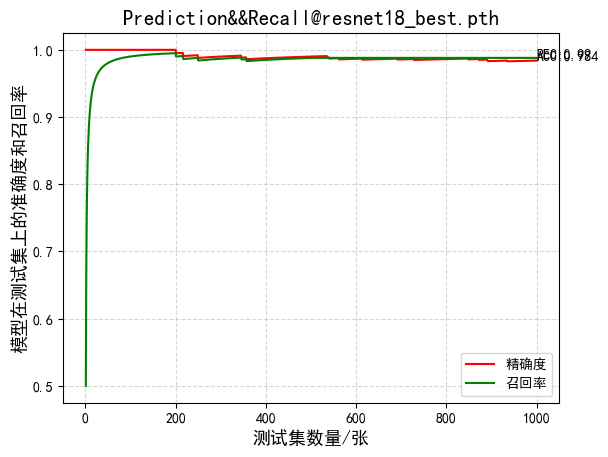

In [25]:
plt.plot(X_label,pre_pth,c='red',label='精确度')
plt.plot(X_label,rec_pth,c='green',label='召回率')
plt.text(X_label[-1],pre_pth[-1],s='ACC:%.3f'%pre_pth[-1])
plt.text(X_label[-1],rec_pth[-1],s='REC:%.2f'%rec_pth[-1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('测试集数量/张',fontsize=13)
plt.ylabel('模型在测试集上的准确度和召回率',fontsize=13)
plt.title('Prediction&&Recall@'+model_name,fontsize=15)
plt.legend(loc="lower right")
plt.savefig('figures/'+model_name.split('.')[0]+'.jpg')
plt.show()